Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aisse Torres"
COLLABORATORS = "Bruna"

---

In [2]:
from __future__ import print_function
%matplotlib inline
%precision 16
import numpy
import matplotlib.pyplot as plt
import pandas as pd

# HW 8:  Linear Algebra Part 2

## Question 1 Ill-conditioned matrices

Consider the system of equations $Ax = b$ defined by
$$A = \begin{bmatrix}
        0.780 & 0.563 \\
        0.913 & 0.659 
    \end{bmatrix}
    \quad \text{and} \quad 
    b = \begin{bmatrix}
        0.217 \\
        0.254 
    \end{bmatrix}.
$$

The true solution of this system is 

$$x^T = [1, -1]$$

Consider for the following questions the **approximate** solutions

$$
    x^T_1 = [0.999, -1.001] \quad \text{and} \quad x^T_2 = [0.341, -0.087]
$$

and define the residual $r(y)$ as

$$
    r(y) = b - A y.
$$

**(a)** (6) Compute the residuals (you may use `numpy`) $||r(x_1)||$ and $||r(x_2)||$ for the two approximate solutions using a couple of different norms.  Does the more accurate solution have a smaller residual?  Does it matter which norm you use?

In [3]:
A = numpy.array([[0.780,0.563],[0.913,0.659]])
b = numpy.array([[0.217],[0.254]])
x1 = numpy.array([[0.999],[-1.001]])
x2 = numpy.array([[0.341],[-0.087]])
res1 = b - numpy.dot(A, x1)
res2 = b - numpy.dot(A, x2)
print("||r(x_1)||1 is {}".format(numpy.linalg.norm(res1,1)))
print("||r(x_1)||2 is {}".format(numpy.linalg.norm(res1,2)))

print("||r(x_2)||1 is {}".format(numpy.linalg.norm(res2,1)))
print("||r(x_2)||2 is {}".format(numpy.linalg.norm(res2,2)))

||r(x_1)||1 is 0.0029149999999999177
||r(x_1)||2 is 0.002067566927574483
||r(x_2)||1 is 9.99999999945489e-07
||r(x_2)||2 is 9.99999999945489e-07


The norm we use does not matter, as the most accurate solution has the smallest residual.

**(b)** [4] Compute $||A||$, $||A^{-1}||$ and the condition number $\kappa(A)$ of the matrix using the $L_2$ and $L_\infty$ norms.  Again you can use `numpy`.

In [4]:
A_inv = numpy.linalg.inv(A)
norm2_A = numpy.linalg.norm(A,2)
norminf_A = numpy.linalg.norm(A,numpy.inf)
norm2_A_inv = numpy.linalg.norm(A_inv,2)
norminf_A_inv = numpy.linalg.norm(A_inv,numpy.inf)

print('||A||2 is {}'.format(norm2_A))
print('||A||inf is {}'.format(norminf_A))
print('||A-1||2 is {}'.format(norm2_A_inv))
print('||A-1||inf is {}'.format(norminf_A_inv))


print('k2(A) is {}:'.format(norm2_A*norm2_A_inv))
print('k_inf(A) is {}:'.format(norminf_A*norminf_A_inv))

||A||2 is 1.4809520586432041
||A||inf is 1.572
||A-1||2 is 1480952.0584615201
||A-1||inf is 1692999.9997923018
k2(A) is 2193218.999730479:
k_inf(A) is 2661395.9996734983:


**(c)** [8] Calculate the SVD of A and do the following
* check your your answers for $||A||_2$ and $K_2(A)$ in terms of the singular values of $A$
* Compute $A_1$, the best fit rank-1 approximation to $A$.
* Compute $A - A_1$ and calculate $|| A - A_1||_2$ and compare to the singular values
* Given $A_1$ find its pseudo-inverse $A^+$
* Find the approximate solution $\mathbf{x}^+ = A^+\mathbf{b}$ and calculate $||\mathbf{r}(\mathbf{x}^+)||_2$

In [7]:
u, s, vt = numpy.linalg.svd(A,full_matrices=False)
print('||A||2 in terms of the singular values of A is: {}'.format(s[0]))
print('\k2(A) in terms of the singular values of A is: {}'.format(s[0]/s[1]))

A1 = numpy.dot(u[:,:1], numpy.dot(numpy.diag(s[:1]), vt[:1,:]))
print('A1 is {}'.format(A1))

print('A - A1 is {}'.format(A - A1))
print('||A - A1||2 is {}'.format(numpy.linalg.norm(A - A1, 2)))

Ap1 = numpy.dot(vt.T[:,:1], numpy.dot(numpy.diag(1./s[:1]), u.T[:1,:]))
print('Pseudo-inverse A+ is {}'.format(Ap1))

x_plus = numpy.dot(Ap1, b)
print('x+ is {}'.format(x_plus))
resx = b - numpy.dot(A, x_plus)
print("||x+||2 is {}".format(numpy.linalg.norm(resx, 2)))

||A||2 in terms of the singular values of A is: 1.480952058643204
\k2(A) in terms of the singular values of A is: 2193218.99965077
A1 is [[0.779999699528572  0.5630004162832148]
 [0.913000256700501  0.6589996443584979]]
A - A1 is [[ 3.004714280718801e-07 -4.162832148990603e-07]
 [-2.567005009668222e-07  3.556415021366277e-07]]
||A - A1||2 is 6.752413045222178e-07
Pseudo-inverse A+ is [[0.3556415020701236 0.4162832150828034]
 [0.2567005010823507 0.3004714277774518]]
x+ is [[0.1829101425802489]
 [0.1320237513903429]]
||x+||2 is 9.427088346684577e-07


The largest singular value is given by value of matrix A with norm 2 and the 𝜅2(𝐴) with the ratio of the greatest singular value of A over the smallest singular value of 𝐴. This gives the same result as if we used the function to compute them. Accordingly, using the best fit rank-1 approximation of A and its pseudo inverse to find 𝑥+, gives a very small residual value which is significantly smaller than the residual of 𝑥𝑇1.

**(d)** [4] Use the SVD to explain the behavior from part (a) 

Hint:  to understand this problem,  consider the change in the residual $\delta \mathbf{r}$ for a change in the solution vector $\delta \mathbf{x}$, i.e.
$$
    \delta\mathbf{r} = \mathbf{r}(\mathbf{x} + \delta\mathbf{x}) - \mathbf{r}(\mathbf{x})
$$

and compute upper and lower bounds on

$$
    \frac{||\delta \mathbf{r}||_2}{||\delta\mathbf{x}||_2}
$$
and consider what values of $\delta\mathbf{x}$ correspond to the upper and lower bounds.

Then consider the behavior of $\delta\mathbf{x}_i = \mathbf{x} - \mathbf{x}_i$ for $i=1,2$ above and explain the difference in residuals (hint: think SVD)

    Consider:
    
$$ \delta\mathbf{r} = \mathbf{r}(\mathbf{x} + \delta\mathbf{x}) - \mathbf{r}(\mathbf{x})$$

    and
    
$$ r(x) = b - Ax $$

    we can write: 
    
$$ \delta r = b - A(x+\delta x) - b + Ax = - A \delta x $$

    hence:
    
$$ \frac{||\delta r||_2}{||\delta x||_2} = \frac{||A \delta x||_2}{||\delta x||_2} $$


This is the induced vector of 2-norm of the matrix $A$. Which gives an upper bound of $\frac{||\delta \mathbf{r}||_2}{||\delta\mathbf{x}||_2}$ and it is the greatest singular value of matrix A and the lower bound of it the smallest singular value of matrix A. Therefore: 

$$ \sigma_2 \leq \frac{||A \delta x||_2}{||\delta x||_2} \leq \sigma_1 $$

    Finally: 
    
If $\delta x_1$ is in the direction of thegreater singular value $\sigma_1$, it is also in the direction of the row space of A. Since it will map on $V_1$, the greater direction, any small changes to the perturbation in $\delta x_1$ significantly changes the residual. Conversly, as $\delta x_2$ is in the direction of the smaller singular value, it is also in the direction of the null space of A, and it is projected on $V_2$ the smaller direction, so even a huge perturbation on $\delta x_2$ would not change the norm of the residual.

In [9]:
x = numpy.array([[1], [-1]])
delta_x1 = x1 - x
delta_x2 = x2 - x

y1 = vt.dot(delta_x1)
y2 = vt.dot(delta_x2)

print('delta_x1 = {}'.format(delta_x1))
print('VT delta_x1 ={}'.format(y1))
print('delta_x2 = {}'.format(delta_x2))
print('VT delta_x2 ={}'.format(y2))

delta_x1 = [[-0.001             ]
 [-0.0009999999999999]]
VT delta_x1 =[[ 0.0013961065893441]
 [-0.0002255801214422]]
delta_x2 = [[-0.659]
 [ 0.913]]
VT delta_x2 =[[4.3860691423258658e-07]
 [1.1259884546476522e+00]]


### Question 2 - Hidden Figures

Okay a little more fun with the SVD.  Here we are going to use it extract low-dimensional information embedded in high dimensions.

The following cells will read in a matrix of 46765 samples of 5-dimensional data and make a series of scatter plots comparing the data along each dimension pairwise.

In [11]:
data = pd.read_csv('data.csv.gz').values
print('shape = {}'.format(data.shape))

shape = (46765, 5)


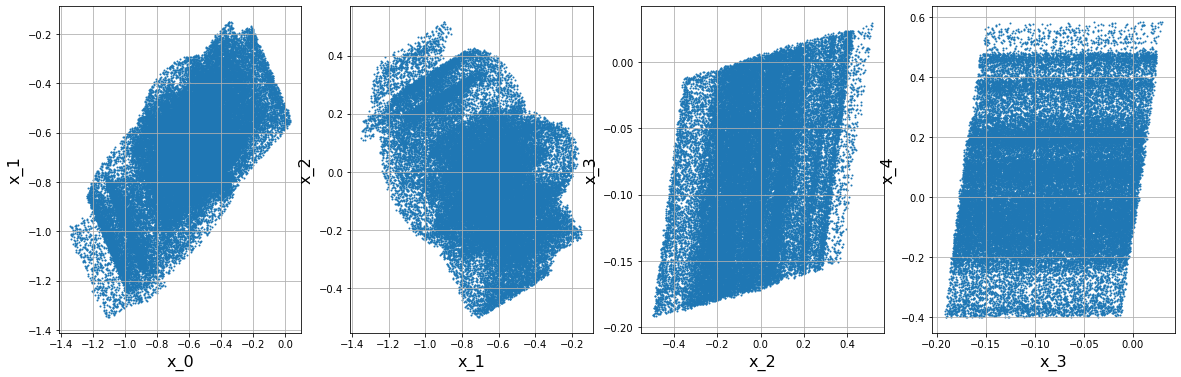

In [12]:
# plot scatter diagrams

fig = plt.figure(figsize=(20,6))
for i in range(4):
    axes = fig.add_subplot(1,4,i+1)
    axes.scatter(data[:,i],data[:,i+1],s=1)
    axes.set_xlabel('x_{}'.format(i), fontsize=16)
    axes.set_ylabel('x_{}'.format(i+1),fontsize=16)
    axes.grid()
plt.show()

**(a)** [6] Now demean the data and use the SVD to determine the dimension of the subspace of $\mathbb{R}^5$ that contains the data. Making a plot of the singular values will help. (hint: you will also want to use the `full_matrices=False` argument to the SVD to get the skinny SVD and save a lot of computation and memory)

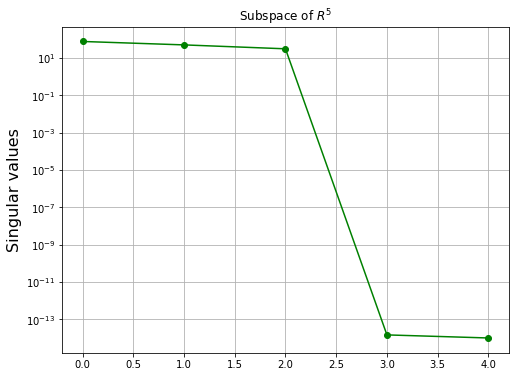

s = [7.6977653528474093e+01 5.0426530816381131e+01 3.1107721947130216e+01
 1.4570039436520250e-14 9.9743833758676677e-15]


In [14]:
mean = data.mean(axis=0)
demean_data = data - mean
u, s, vt = numpy.linalg.svd(demean_data,full_matrices=False)
fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1, 1, 1)
axes.semilogy(s,'go-')
axes.set_ylabel('Singular values', fontsize=16)
axes.grid()
axes.set_title('Subspace of $R^5$')
plt.show()
print('s = {}'.format(s))

The first three values of the matrix are non zero singular values and the rest are very small almost equal to zero, which means that the dataset has low dimensional structure 

**(b)** [4]  Principal Components. Make a 2-D scatter plot that projects the data onto the plane spanned by the first two principal components (singular vectors of $V$).  and comment.  (**Extra Credit** do this in 3-D)

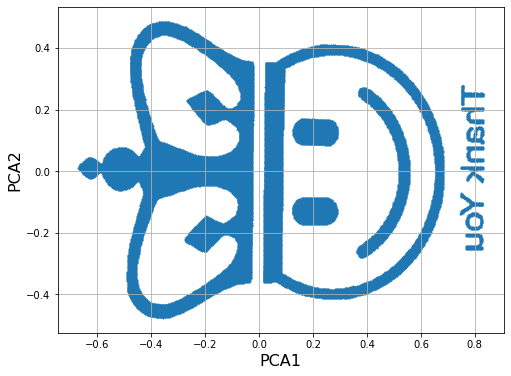

In [15]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

X_svd = numpy.dot(u[:,:2], numpy.diag(s[:2]))
X_svd.shape

fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(1,1,1)
axes.scatter(X_svd[:,0],X_svd[:,1],s=1)
axes.set_xlabel('PCA1', fontsize=16)
axes.set_ylabel('PCA2',fontsize=16)
axes.grid()

plt.show()

This figure still shows a low dimsensional data set 

### Question 3 - Extra Credit LU Factorization

Gaussian elimination is usually one of the first operations students learn in linear algebra but we seemed to have skipped it in lecture!  Let us fix that here in the homework.  Make sure to read the lecture notes on Gaussian elimination when doing this question.  Useful versions of pseudo-code for this algorithm are available in that notebook.

**(a)** (5 points) By hand compute the $LU$ factorization of the matrix
$$
    A = \begin{bmatrix}
        4 & 8 & 1 \\
        8 & 20 & 4 \\
        16 & 36 & 7
    \end{bmatrix}.
$$
Make sure to compute all the way to the matrix $L$, not the components of the inverse.  You do not have to worry about pivoting.

$$ P_1 = \begin{bmatrix}
         0 &  0 & 1   \\
          0& 1 &0      \\
        1 &  0 &0    \\
    \end{bmatrix} \quad \therefore \quad
    P_1 A = \begin{bmatrix}
        16 & 36 & 7  \\
        8 & 20 & 4  \\
        4 & 8 & 1  
    \end{bmatrix} $$

    Consider:

$$ L_1 = \begin{bmatrix}
        1 &  0 & 0     \\
        -\frac{1}{2} & 1 &  0   \\
        -\frac{1}{4} &  0 & 1   \\
    \end{bmatrix} \quad \therefore \quad
    L_1 P_1 A = \begin{bmatrix}
        16 & 36 & 7  \\
          0& 2 & \frac{1}{2} \\
          0& -1 & -\frac{3}{4} 
    \end{bmatrix} $$

$$ P_2 = \begin{bmatrix}
        1 &  0 &0      \\
          0&  1 & 0  \\
          0& 0  & 1 &  
    \end{bmatrix}  \quad \text{&} \quad 
    L_2 = \begin{bmatrix}
        1 &  0 & 0      \\
         0 & 1 & 0     \\
         0 & \frac{1}{2} & 1 
    \end{bmatrix}  \quad  \therefore  \quad 
    L_2 P_2 L_1 P_1 A = \begin{bmatrix}
        16 &            36 &     7  \\
         0 &  2 &  \frac{1}{2} \\
         0 &  0  & -\frac{1}{2} 
    \end{bmatrix} $$

$$ \therefore L^{-1} = L_2 L_1 = \begin{bmatrix}
        1 &  0 & 0     \\
        -\frac{1}{2} & 1 &  0   \\
        -\frac{1}{4} &  0 & 1   
    \end{bmatrix}
     \begin{bmatrix}
        1 &  0 & 0      \\
         0 & 1 & 0     \\
         0 & \frac{1}{2} & 1 
    \end{bmatrix}
     =\begin{bmatrix}
         1 & 0  & 0    \\
         -\frac{1}{2} & 1 & 0    \\
         -\frac{1}{4} & \frac{1}{2} & 1  
    \end{bmatrix} $$  

$$ \therefore \begin{align*}
    U = \begin{bmatrix}
        16 &  36 &  7  \\
         0 &  2 &  \frac{1}{2} \\
         0 &  0  & -\frac{1}{2} 
    \end{bmatrix}
    \end{align*} $$

**(b)** (10 points) Write a function that computes the $LU$ factorization of a given matrix $A \in \mathbb R^{n \times n}$ without using `numpy` or `scipy` packages.  Make sure to also return the pivoting matrix, i.e. compute the matrices $P$, $L$, and $U$ where
$$
    P A = L U.
$$
Note that the provided function `swap_rows` may be useful although you do not have to use it.  You may also want to use the example in the notes to test your basic algorithm with (i.e. `A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)` noting that the algorithm will complain without the casting to `float`).

In [ ]:
def swap_rows(i, j, A, column_indices=None):
    r"""
    Swap the ith and jth rows of the matrix A in place
    
    Optional argument column_indices is a tuple that controls 
    the columns being swapped.  Defaults to the entire row.
    """
    if column_indices is None:
        column_indices = (0, A.shape[0])
    
    pivot_row = A[i, column_indices[0]:column_indices[1]].copy()
    A[i, column_indices[0]:column_indices[1]] = A[j, column_indices[0]:column_indices[1]]
    A[j, column_indices[0]:column_indices[1]] = pivot_row


def LU_factorization(A):
    # YOUR CODE HERE
    raise NotImplementedError()
    return P, L, U

In [ ]:
import scipy.linalg
# A = numpy.array([[2, 1, 1, 0], [4, 3, 3, 1], [8, 7, 9, 5], [6, 7, 9, 8]], dtype=float)
A = numpy.random.uniform(low=1.0, high=10.0, size=(25, 25))
P, L, U = LU_factorization(A)
P_s, L_s, U_s = scipy.linalg.lu(A)
numpy.testing.assert_allclose(P, numpy.linalg.inv(P_s))
numpy.testing.assert_allclose(L, L_s)
numpy.testing.assert_allclose(U, U_s, atol=1e-8)
print("Success!")

**(c)** (5 points) For this question write a function that solves the system $A x = b$ given an $A$ and $b$ using your $LU$ factorization function and the pivot matrix.  Again do not use any of the functions from `numpy` or `scipy` other than to check your solution.

In [ ]:
def solve(A, b):
    # YOUR CODE HERE
    raise NotImplementedError()
    return x

In [ ]:
m = 10
A = numpy.random.uniform(size=(m, m))
b = numpy.random.uniform(size=(m))
x = solve(A, b)
x_n = numpy.linalg.solve(A, b)
numpy.testing.assert_allclose(x, x_n)
print("Success!")